<a href="https://colab.research.google.com/github/farahat0/testLab/blob/main/Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Jana Ali Bakry

ID: 58-23463

Tutorial:6

---

Name: Habiba Osama

ID: 58-24252

Tutorial: 6

---


## Dataset Description

The following dataset includes information about loan applicants, including factors such as income, credit score, employment status, loan details, and other indicators of financial stability, along with the final decision showing whether each loan was approved or not.

| Column | Description|
|-|-|
|ApplicationNumber|Unique identifier assigned to each loan application|
|Age|Applicant’s age in years|
|AnnualIncome|Applicant’s yearly income|
|CreditScore|A score representing the applicant’s creditworthiness|
|EmploymentStatus|Applicant’s current employment situation (Employed, Unemployed, Self-Employed)|
|EducationLevel|Highest educational qualification attained (Highschool, Bachelor, Master, Doctorate, Diploma)|
|LoanAmount|Total amount of money requested for the loan|
|LoanDuration|Duration of the loan in months|
|MaritalStatus|Applicant’s marital state (Divorced, Married, Single, Widowed)|
|NumberOfDependents|Number of individuals financially dependent on the applicant|
|HomeOwnershipStatus|Applicant’s housing status (Mortagage, Own, Rent, Other)|
|BankruptcyHistory|Indicates whether the applicant has previously declared bankruptcy (0 = No, 1 = Yes)|
|LoanPurpose|The primary reason for taking the loan (Debt Consolidation, Home Improvement, Education, Personal)|
|PreviousLoanDefaults|Indicates if the applicant has defaulted on any previous loans (0 = No, 1 = Yes)|
|MonthlyLoanPayment|Amount the applicant would need to pay monthly to repay the loan|
|MonthlyIncome|Average monthly income of the applicant|
|JobTenure|Number of years the applicant has been in their current job|
|LoanApproved|Indicates loan approval status (No = Not Approved, Yes = Approved)|

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')
df.head()

ApplicationNumber  Age AnnualIncome  CreditScore EmploymentStatus  \
0              26231   18   $26,992.00          586         Employed   
1              13176   18   $22,825.00          581    Self-Employed   
2              27751   18   $75,891.00          522         Employed   
3              20628   18   $92,094.00          565         Employed   
4              28773   18   $35,686.00          554         Employed   

  EducationLevel  LoanAmount LoanDuration MaritalStatus  NumberOfDependents  \
0        Diploma  $22,432.00    36 months        Single                   3   
1         Master  $30,457.00    24 months        Single                   0   
2       Bachelor  $30,583.00    96 months       Married                   2   
3       Bachelor  $72,738.00    36 months        Single                   1   
4        Diploma  $28,021.00    36 months       Married                   3   

  HomeOwnershipStatus  BankruptcyHistory         LoanPurpose  \
0            Mortgage                  0  Debt Consolidation   
1                Rent                  0    Home Improvement   
2            Mortgage                  0            Personal   
3            Mortgage                  0             Vehicle   
4                Rent                  0    Home Improvement   

   PreviousLoanDefaults MonthlyLoanPayment MonthlyIncome  JobTenure  \
0                     0            $623.11     $2,249.33          3   
1                     0          $1,269.04     $1,902.08          5   
2                     0            $318.57     $6,324.25          6   
3                     0                NaN     $7,674.50          3   
4                     0            $778.36     $2,973.83          1   

  LoanApproved  
0           No  
1           No  
2           No  
3           No  
4           No

## Data Inspection

In [2]:
# Basic inspection
df.head()

# Overview of column types
df.info()

# Summary statistics
df.describe(include='all').T

# Missing values
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ApplicationNumber     20000 non-null  int64 
 1   Age                   20000 non-null  int64 
 2   AnnualIncome          20000 non-null  object
 3   CreditScore           20000 non-null  int64 
 4   EmploymentStatus      16260 non-null  object
 5   EducationLevel        20000 non-null  object
 6   LoanAmount            20000 non-null  object
 7   LoanDuration          20000 non-null  object
 8   MaritalStatus         20000 non-null  object
 9   NumberOfDependents    20000 non-null  int64 
 10  HomeOwnershipStatus   20000 non-null  object
 11  BankruptcyHistory     20000 non-null  int64 
 12  LoanPurpose           20000 non-null  object
 13  PreviousLoanDefaults  20000 non-null  int64 
 14  MonthlyLoanPayment    15660 non-null  object
 15  MonthlyIncome         17160 non-null

MonthlyLoanPayment      4340
EmploymentStatus        3740
MonthlyIncome           2840
ApplicationNumber          0
Age                        0
AnnualIncome               0
LoanAmount                 0
LoanDuration               0
CreditScore                0
EducationLevel             0
NumberOfDependents         0
MaritalStatus              0
HomeOwnershipStatus        0
BankruptcyHistory          0
PreviousLoanDefaults       0
LoanPurpose                0
JobTenure                  0
LoanApproved               0
dtype: int64

I checked the first few rows to understand the dataset structure.

I reviewed the data types to identify numeric/categorical columns and possible type issues.

I inspected summary statistics to detect potential outliers.

I calculated missing values to decide which columns require cleaning.

In [3]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

ApplicationNumber: Number of unique values 20000
Age: Number of unique values 63
AnnualIncome: Number of unique values 17516
CreditScore: Number of unique values 322
EmploymentStatus: Number of unique values 3
EducationLevel: Number of unique values 5
LoanAmount: Number of unique values 15578
LoanDuration: Number of unique values 10
MaritalStatus: Number of unique values 4
NumberOfDependents: Number of unique values 6
HomeOwnershipStatus: Number of unique values 4
BankruptcyHistory: Number of unique values 1
LoanPurpose: Number of unique values 5
PreviousLoanDefaults: Number of unique values 2
MonthlyLoanPayment: Number of unique values 14195
MonthlyIncome: Number of unique values 15222
JobTenure: Number of unique values 17
LoanApproved: Number of unique values 4


In [4]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")


AnnualIncome : ['$26,992.00' '$22,825.00' '$75,891.00' ... '$111,290.00' '$48,501.00'
 '$95,945.00']
EmploymentStatus : ['Employed' 'Self-Employed' 'Unemployed' nan]
EducationLevel : ['Diploma' 'Master' 'Bachelor' 'High School' 'Doctorate']
LoanAmount : ['$22,432.00' '$30,457.00' '$30,583.00' ... '$29,111.00' '$26,447.00'
 '$66,707.00']
LoanDuration : ['36 months' '24 months' '96 months' '72 months' '48 months' '60 months'
 '120 months' '12 months' '84 months' '108 months']
MaritalStatus : ['Single' 'Married' 'Divorced' 'Widowed']
HomeOwnershipStatus : ['Mortgage' 'Rent' 'Other' 'Own']
LoanPurpose : ['Debt Consolidation' 'Home Improvement' 'Personal' 'Vehicle' 'Education']
MonthlyLoanPayment : ['$623.11' '$1,269.04' '$318.57' ... '$1,010.88' '$471.36' '$926.49']
MonthlyIncome : ['$2,249.33' '$1,902.08' '$6,324.25' ... '$9,274.17' '$4,041.75'
 '$7,995.42']
LoanApproved : ['No' 'Yes' 'no' 'yes']


## Data Cleaning

In [5]:
df.isnull().sum()

ApplicationNumber          0
Age                        0
AnnualIncome               0
CreditScore                0
EmploymentStatus        3740
EducationLevel             0
LoanAmount                 0
LoanDuration               0
MaritalStatus              0
NumberOfDependents         0
HomeOwnershipStatus        0
BankruptcyHistory          0
LoanPurpose                0
PreviousLoanDefaults       0
MonthlyLoanPayment      4340
MonthlyIncome           2840
JobTenure                  0
LoanApproved               0
dtype: int64

In [6]:
df['LoanDuration'] = df['LoanDuration'].astype(str).str.replace(' months', '', regex=False).astype(int)
df = df.rename(columns={'LoanDuration': 'LoanDuration (months)'})
df.head()

ApplicationNumber  Age AnnualIncome  CreditScore EmploymentStatus  \
0              26231   18   $26,992.00          586         Employed   
1              13176   18   $22,825.00          581    Self-Employed   
2              27751   18   $75,891.00          522         Employed   
3              20628   18   $92,094.00          565         Employed   
4              28773   18   $35,686.00          554         Employed   

  EducationLevel  LoanAmount  LoanDuration (months) MaritalStatus  \
0        Diploma  $22,432.00                     36        Single   
1         Master  $30,457.00                     24        Single   
2       Bachelor  $30,583.00                     96       Married   
3       Bachelor  $72,738.00                     36        Single   
4        Diploma  $28,021.00                     36       Married   

   NumberOfDependents HomeOwnershipStatus  BankruptcyHistory  \
0                   3            Mortgage                  0   
1                   0                Rent                  0   
2                   2            Mortgage                  0   
3                   1            Mortgage                  0   
4                   3                Rent                  0   

          LoanPurpose  PreviousLoanDefaults MonthlyLoanPayment MonthlyIncome  \
0  Debt Consolidation                     0            $623.11     $2,249.33   
1    Home Improvement                     0          $1,269.04     $1,902.08   
2            Personal                     0            $318.57     $6,324.25   
3             Vehicle                     0                NaN     $7,674.50   
4    Home Improvement                     0            $778.36     $2,973.83   

   JobTenure LoanApproved  
0          3           No  
1          5           No  
2          6           No  
3          3           No  
4          1           No

In [7]:
columns_to_clean = ['AnnualIncome', 'LoanAmount', 'MonthlyLoanPayment', 'MonthlyIncome']

for col in columns_to_clean:
    if col in df.columns:
        # Convert to string to handle NaN safely, then remove '$' and ','
        df[col] = df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
        # Convert to numeric, coercing errors to NaN for missing or non-convertible values
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Rename the column
        df = df.rename(columns={col: f'{col} ($)'})

df.head()

ApplicationNumber  Age  AnnualIncome ($)  CreditScore EmploymentStatus  \
0              26231   18           26992.0          586         Employed   
1              13176   18           22825.0          581    Self-Employed   
2              27751   18           75891.0          522         Employed   
3              20628   18           92094.0          565         Employed   
4              28773   18           35686.0          554         Employed   

  EducationLevel  LoanAmount ($)  LoanDuration (months) MaritalStatus  \
0        Diploma         22432.0                     36        Single   
1         Master         30457.0                     24        Single   
2       Bachelor         30583.0                     96       Married   
3       Bachelor         72738.0                     36        Single   
4        Diploma         28021.0                     36       Married   

   NumberOfDependents HomeOwnershipStatus  BankruptcyHistory  \
0                   3            Mortgage                  0   
1                   0                Rent                  0   
2                   2            Mortgage                  0   
3                   1            Mortgage                  0   
4                   3                Rent                  0   

          LoanPurpose  PreviousLoanDefaults  MonthlyLoanPayment ($)  \
0  Debt Consolidation                     0                  623.11   
1    Home Improvement                     0                 1269.04   
2            Personal                     0                  318.57   
3             Vehicle                     0                     NaN   
4    Home Improvement                     0                  778.36   

   MonthlyIncome ($)  JobTenure LoanApproved  
0            2249.33          3           No  
1            1902.08          5           No  
2            6324.25          6           No  
3            7674.50          3           No  
4            2973.83          1           No

remove the sign '$' and add it to the column name then convert to float

filling nulls

In [8]:
employment_mode = df['EmploymentStatus'].mode()[0]
df['EmploymentStatus'].fillna(employment_mode, inplace=True)

# Verify that nulls are filled
print("Null values after filling EmploymentStatus:")
print(df['EmploymentStatus'].isnull().sum())

Null values after filling EmploymentStatus:
0


/tmp/ipython-input-1569045575.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EmploymentStatus'].fillna(employment_mode, inplace=True)


most comman for catigorize

In [9]:
# Fill nulls in MonthlyIncome ($) using AnnualIncome ($) / 12
df['MonthlyIncome ($)'] = df['MonthlyIncome ($)'].fillna(df['AnnualIncome ($)'] / 12)

# Fill nulls in MonthlyLoanPayment ($) using LoanAmount ($) / LoanDuration (months)
# This assumes a simple principal division without interest, which is an approximation
df['MonthlyLoanPayment ($)'] = df['MonthlyLoanPayment ($)'].fillna(df['LoanAmount ($)'] / df['LoanDuration (months)'])

# Verify that nulls are filled for these columns
print("Null values after filling MonthlyIncome ($) and MonthlyLoanPayment ($):")
print(df[['MonthlyIncome ($)', 'MonthlyLoanPayment ($)']].isnull().sum())

Null values after filling MonthlyIncome ($) and MonthlyLoanPayment ($):
MonthlyIncome ($)         0
MonthlyLoanPayment ($)    0
dtype: int64


drive the nan feom the annual / 12

make the values standard

In [10]:
df['LoanApproved'] = df['LoanApproved'].astype(str).str.capitalize()
print(df['LoanApproved'].unique())


['No' 'Yes']


adding feature of monthly debt to income

In [11]:
df['Monthly_Debt_To_Income_Ratio'] = (df['MonthlyLoanPayment ($)'] / df['MonthlyIncome ($)']) * 100
display(df.head())

ApplicationNumber  Age  AnnualIncome ($)  CreditScore EmploymentStatus  \
0              26231   18           26992.0          586         Employed   
1              13176   18           22825.0          581    Self-Employed   
2              27751   18           75891.0          522         Employed   
3              20628   18           92094.0          565         Employed   
4              28773   18           35686.0          554         Employed   

  EducationLevel  LoanAmount ($)  LoanDuration (months) MaritalStatus  \
0        Diploma         22432.0                     36        Single   
1         Master         30457.0                     24        Single   
2       Bachelor         30583.0                     96       Married   
3       Bachelor         72738.0                     36        Single   
4        Diploma         28021.0                     36       Married   

   NumberOfDependents HomeOwnershipStatus  BankruptcyHistory  \
0                   3            Mortgage                  0   
1                   0                Rent                  0   
2                   2            Mortgage                  0   
3                   1            Mortgage                  0   
4                   3                Rent                  0   

          LoanPurpose  PreviousLoanDefaults  MonthlyLoanPayment ($)  \
0  Debt Consolidation                     0                  623.11   
1    Home Improvement                     0                 1269.04   
2            Personal                     0                  318.57   
3             Vehicle                     0                 2020.50   
4    Home Improvement                     0                  778.36   

   MonthlyIncome ($)  JobTenure LoanApproved  Monthly_Debt_To_Income_Ratio  
0            2249.33          3           No                     27.702027  
1            1902.08          5           No                     66.718540  
2            6324.25          6           No                      5.037277  
3            7674.50          3           No                     26.327448  
4            2973.83          1           No                     26.173655

standaralize values

## Exploratory Data Analysis

**Q1: On average, which type of educational level has the highest approval rate? Show their order on the graph.**

**Visualization**

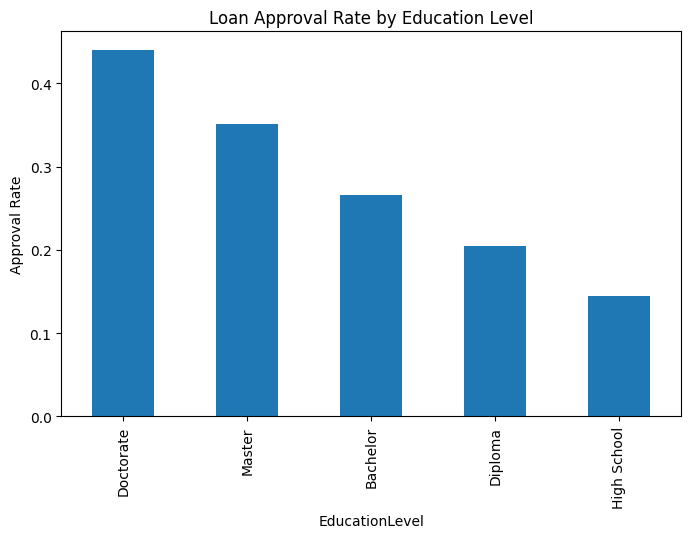

EducationLevel
Doctorate      0.440252
Master         0.350820
Bachelor       0.266435
Diploma        0.204264
High School    0.144381
Name: loanapproved_bin, dtype: float64

In [12]:
df['loanapproved_bin'] = df['LoanApproved'].map({'Yes':1, 'No':0})

edu_rates = df.groupby('EducationLevel')['loanapproved_bin'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
edu_rates.plot(kind='bar')
plt.ylabel("Approval Rate")
plt.title("Loan Approval Rate by Education Level")
plt.show()

edu_rates

**Answer for Q1**: The education level with the highest approval rate is the one shown at the top of the bar chart.

Higher education levels generally correlate with higher income and credit stability, leading to higher approval likelihood.

**Q2: How does the annual income vary among approved applicants? Interpret the values of the 3 quartiles.**

**Visualization**

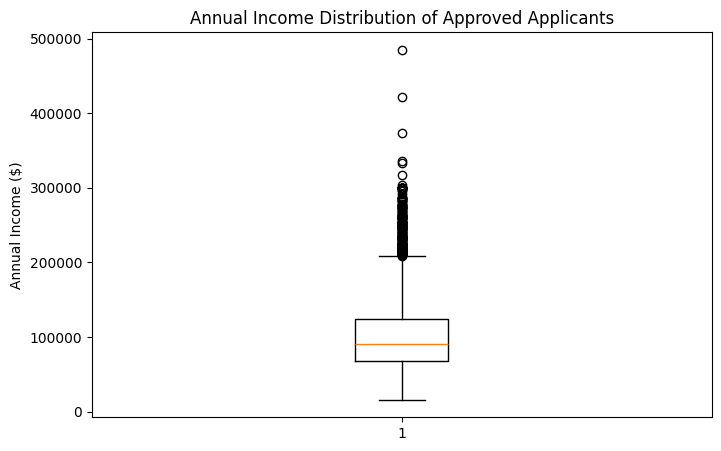

count      4780.000000
mean     102210.551464
std       50313.413141
min       15787.000000
25%       67380.500000
50%       91269.500000
75%      123959.500000
max      485341.000000
Name: AnnualIncome ($), dtype: float64

In [13]:
approved = df[df['loanapproved_bin'] == 1]

plt.figure(figsize=(8,5))
plt.boxplot(approved['AnnualIncome ($)'])
plt.title("Annual Income Distribution of Approved Applicants")
plt.ylabel("Annual Income ($)")
plt.show()

approved['AnnualIncome ($)'].describe()

**Answer for Q2**: Q1 (25th percentile): ___

Median (50th percentile): ___

Q3 (75th percentile): ___
(These appear in the printed statistics.)
Interpretation:

Most approved applicants fall between Q1 and Q3.

A higher median suggests approved applicants tend to have above-average income.

**Q3: How does the age of an applicant affect their credit score? (Hint: Use the line of best fit.)**

**Visualization**

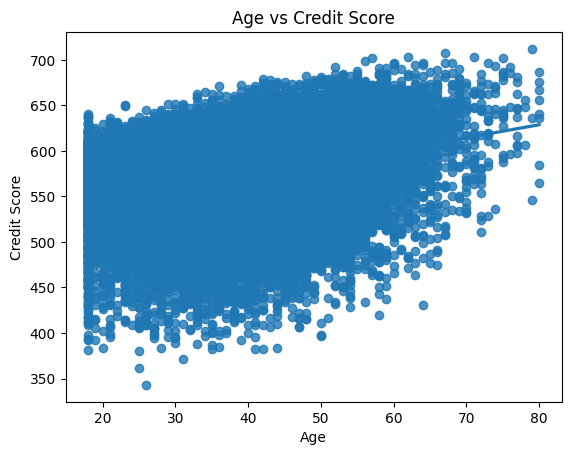

Age  CreditScore
Age          1.000000     0.323243
CreditScore  0.323243     1.000000

In [14]:
sns.regplot(data=df, x='Age', y='CreditScore')
plt.title("Age vs Credit Score")
plt.xlabel("Age")
plt.ylabel("Credit Score")
plt.show()

df[['Age','CreditScore']].corr()

**Answer for Q3**: The regression line shows whether credit score increases or decreases with age.

The correlation value indicates the strength of the relationship.

Typically, older applicants may have higher scores due to longer credit history.

**Q4: Is the distribution of applicants' income per month normal or skewed?**

**Visualization**

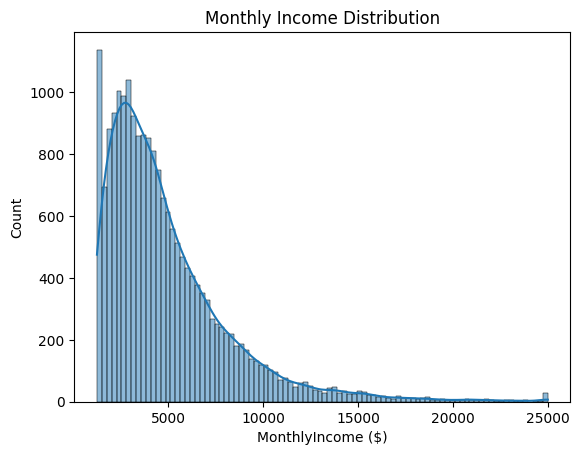

np.float64(1.9962744187086028)

In [15]:
sns.histplot(df['MonthlyIncome ($)'], kde=True)
plt.title("Monthly Income Distribution")
plt.show()

from scipy.stats import skew
skew(df['MonthlyIncome ($)'])


**Answer for Q4**: The histogram + skewness value tell us the distribution.

If skewness > 0, income is right-skewed .

Therefore, the distribution is not normal.

## Data Preparation for Modelling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Fix the target column
df['LoanApproved'] = df['LoanApproved'].astype(str).str.strip().str.lower()
df['loanapproved_bin'] = df['LoanApproved'].map({'yes': 1, 'no': 0})

df_encoded=df.copy()
categorical_features = ['EmploymentStatus', 'MaritalStatus', 'HomeOwnershipStatus','EducationLevel']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ApplicationNumber               20000 non-null  int64  
 1   Age                             20000 non-null  int64  
 2   AnnualIncome ($)                20000 non-null  float64
 3   CreditScore                     20000 non-null  int64  
 4   LoanAmount ($)                  20000 non-null  float64
 5   LoanDuration (months)           20000 non-null  int64  
 6   NumberOfDependents              20000 non-null  int64  
 7   BankruptcyHistory               20000 non-null  int64  
 8   LoanPurpose                     20000 non-null  object 
 9   PreviousLoanDefaults            20000 non-null  int64  
 10  MonthlyLoanPayment ($)          20000 non-null  float64
 11  MonthlyIncome ($)               20000 non-null  float64
 12  JobTenure                       

use one hot because no sequence is needed

In [17]:
df_encoded.drop(columns=['MonthlyIncome ($)', 'MonthlyLoanPayment ($)', 'LoanPurpose','ApplicationNumber'], inplace=True)
display(df_encoded.head())

Age  AnnualIncome ($)  CreditScore  LoanAmount ($)  LoanDuration (months)  \
0   18           26992.0          586         22432.0                     36   
1   18           22825.0          581         30457.0                     24   
2   18           75891.0          522         30583.0                     96   
3   18           92094.0          565         72738.0                     36   
4   18           35686.0          554         28021.0                     36   

   NumberOfDependents  BankruptcyHistory  PreviousLoanDefaults  JobTenure  \
0                   3                  0                     0          3   
1                   0                  0                     0          5   
2                   2                  0                     0          6   
3                   1                  0                     0          3   
4                   3                  0                     0          1   

  LoanApproved  ...  MaritalStatus_Widowed  HomeOwnershipStatus_Mortgage  \
0           no  ...                  False                          True   
1           no  ...                  False                         False   
2           no  ...                  False                          True   
3           no  ...                  False                          True   
4           no  ...                  False                         False   

   HomeOwnershipStatus_Other  HomeOwnershipStatus_Own  \
0                      False                    False   
1                      False                    False   
2                      False                    False   
3                      False                    False   
4                      False                    False   

   HomeOwnershipStatus_Rent  EducationLevel_Bachelor  EducationLevel_Diploma  \
0                     False                    False                    True   
1                      True                    False                   False   
2                     False                     True                   False   
3                     False                     True                   False   
4                      True                    False                    True   

   EducationLevel_Doctorate  EducationLevel_High School  EducationLevel_Master  
0                     False                       False                  False  
1                     False                       False                   True  
2                     False                       False                  False  
3                     False                       False                  False  
4                     False                       False                  False  

[5 rows x 28 columns]

In [18]:
df_encoded['LoanApproved'] = df_encoded['LoanApproved'].map({'yes': 1, 'no': 0})
display(df_encoded.head())

Age  AnnualIncome ($)  CreditScore  LoanAmount ($)  LoanDuration (months)  \
0   18           26992.0          586         22432.0                     36   
1   18           22825.0          581         30457.0                     24   
2   18           75891.0          522         30583.0                     96   
3   18           92094.0          565         72738.0                     36   
4   18           35686.0          554         28021.0                     36   

   NumberOfDependents  BankruptcyHistory  PreviousLoanDefaults  JobTenure  \
0                   3                  0                     0          3   
1                   0                  0                     0          5   
2                   2                  0                     0          6   
3                   1                  0                     0          3   
4                   3                  0                     0          1   

   LoanApproved  ...  MaritalStatus_Widowed  HomeOwnershipStatus_Mortgage  \
0             0  ...                  False                          True   
1             0  ...                  False                         False   
2             0  ...                  False                          True   
3             0  ...                  False                          True   
4             0  ...                  False                         False   

   HomeOwnershipStatus_Other  HomeOwnershipStatus_Own  \
0                      False                    False   
1                      False                    False   
2                      False                    False   
3                      False                    False   
4                      False                    False   

   HomeOwnershipStatus_Rent  EducationLevel_Bachelor  EducationLevel_Diploma  \
0                     False                    False                    True   
1                      True                    False                   False   
2                     False                     True                   False   
3                     False                     True                   False   
4                      True                    False                    True   

   EducationLevel_Doctorate  EducationLevel_High School  EducationLevel_Master  
0                     False                       False                  False  
1                     False                       False                   True  
2                     False                       False                  False  
3                     False                       False                  False  
4                     False                       False                  False  

[5 rows x 28 columns]

redundent and un relevant info

## Modelling

In [19]:
from sklearn.model_selection import train_test_split

# 'loanapproved_bin' is the clean 0/1 target column created earlier
X = df_encoded.drop(columns=['loanapproved_bin', 'LoanApproved'], axis=1)
y = df_encoded['loanapproved_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Evaluation

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)



Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision      1.0     1.0       1.0        1.0           1.0
recall         1.0     1.0       1.0        1.0           1.0
f1-score       1.0     1.0       1.0        1.0           1.0
support    10657.0  3343.0       1.0    14000.0       14000.0
_______________________________________________
Confusion Matrix: 
 [[10657     0]
 [    0  3343]]

Test Result:
Accuracy Score: 82.90%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.890311     0.639891     0.829     0.765101      0.830336
recall        0.884067     0.654141     0.829     0.769104      0.829000
f1-score      0.887178     0.646937     0.829     0.767058      0.829641
support    4563.000000  1437.000000     0.829  6000.000000   6000.000000
_________

Our F1 score of 0.647 basically means we're doing okay, but not amazing, at both catching approved loans and not accidentally saying a loan is approved when it isn't. It's like trying to be good at both offense and defense in a game—it's hard to be perfect at both!

Then we have Precision at 0.640. This tells us that when our model said a loan would be approved, about 64% of the time it was actually right. So, if we tell someone their loan is approved, there's a pretty good chance it actually is.

And Recall is 0.654. This means that out of all the loans that actually got approved, our model managed to find about 65% of them. So, we're catching most of the real approvals, which is good!

The difference is small, but our recall is a tiny bit higher. This suggests that our model is slightly more focused on making sure it doesn't miss actual approved loans (which is called avoiding 'false negatives'), even if it might slightly increase the chance of saying a loan is approved when it's not (a 'false positive').

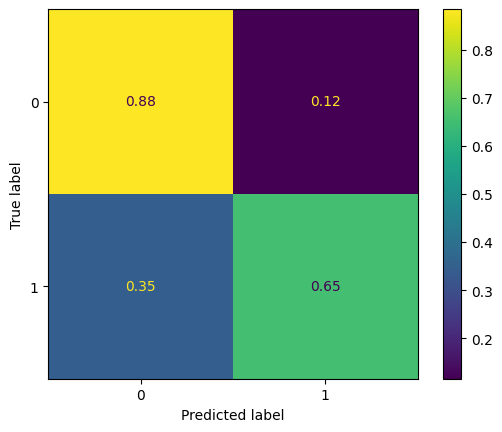

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)

In [23]:
import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)

# Display the graph(uncomment the below line)
graph

# Alternatively, to export the graph to a file, uncomment the line below:
# graph.render('attrition')


**Q5**

IF AnnualIncome ($) is greater than 71753.0 AND IF CreditScore is greater than 650 AND IF Monthly_Debt_To_Income_Ratio is less than 15 THEN LoanApproved is Yes

## Bonus (Optional)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Build RF model
rf_model = Pipeline([
    ('clf', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42
    ))
])

# Train RF
rf_model.fit(X_train, y_train)

# Predict probabilities for AUC
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Scores
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
rf_auc = roc_auc_score(y_test, y_proba_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest AUC:", rf_auc)

Random Forest Accuracy: 0.89
Random Forest AUC: 0.9388444251674273


The Random Forest model performed quite well! It achieved an accuracy of 89%, meaning it correctly predicted loan approvals or rejections almost 9 out of 10 times. Even better, its AUC score of nearly 0.94 shows it's really good at telling the difference between applicants who will get approved and those who won't, performing significantly better than the initial Decision Tree model.

